In [37]:
import os
import pandas as pd
import torch
import RNNutils as utils

In [38]:
DATA_PATH='data/'
file_list=os.listdir(DATA_PATH)[:-1]
print(file_list)

['0', '1', '2', '3', '4', '5', '6', '7']


In [39]:
texts=[]
labels=[]
for label in file_list:
    text_list=os.listdir(f'{DATA_PATH}/{label}')
    for tt in text_list:
        with open(f'{DATA_PATH}/{label}/{tt}') as f:
            a=f.read()
            texts.append(a)
            labels.append(int(label))

In [40]:
print(f'texts number : {len(texts)}')
print(f'labels number : {len(labels)}')

texts number : 1600
labels number : 1600


In [41]:
data=pd.DataFrame()
data['text']=texts
data['label']=labels
data

,text,label
0,"동남아 담당' 北 최희철 부상 베이징 도착…싱가포르행 주목\t최 부상, 행선지·방문...",0
1,"예결위, 추경 막바지 심사 진통…여야 충돌\t(서울=연합뉴스) 김남권 기자 = 국회...",0
2,외압 논란·항명 사태…산 넘고 물 건넌 권성동 영장 청구\t안미현 검사 외압 폭로 ...,0
3,"친문 홍영표, 문빠에 찍혔다…특검 합의에 문자폭탄 공격\t대표적인 친(親)문재인계인...",0
4,"北, 연일 南비난…韓美정상회담 전 경고성 메시지 발신\t南, 맥스선더·태영호 등 불...",0
...,...,...
1595,"단일팀 추진' 대한카누연맹, 데상트코리아와 5년 후원 협약\t[스포티비뉴스=조형애 ...",7
1596,"올림픽 성공 뒷이야기... 서울대, 16일 이희범 평창 조직위원장 초청 특강\t[O...",7
1597,21일 개막 호치민3쿠션월드컵에 149명 참가 확정\t韓선수 46명 참가…1차 예선...,7
1598,"스포츠안전재단, 대축전에 안전필요성 알려\t[스타뉴스 채준 기자]\n\n\n스포츠안...",7


In [42]:
# 데이터셋 분리

train=data.sample(frac=0.8,random_state=32)
test=data.drop(train.index)
print(f'train shape {train.shape}')
print(f'test shape {test.shape}')

train shape (1280, 2)
test shape (320, 2)


In [43]:
# 토큰화, 불용어 제거
from konlpy.tag import Okt

tokenizer=Okt()

traintoken=utils.getToken(train.text,tokenizer)
testtoken=utils.getToken(test.text,tokenizer)

In [44]:
# 단어사전 생성 및 넘버링
vocab=utils.get_vocab(traintoken,n_vocab=10000)

token_to_idx={token:idx for idx,token in enumerate(vocab)}
idx_to_token={idx:token for idx,token in enumerate(vocab)}

print(token_to_idx)

{'<pad>': 0, '<oov>': 1, '일': 2, '년': 3, '않다': 4, '말': 5, '전': 6, '월': 7, '없다': 8, '받다': 9, '보다': 10, '기자': 11, '명': 12, '한국': 13, '밝히다': 14, '서울': 15, '위': 16, '늘다': 17, '오다': 18, '지난': 19, '따르다': 20, '이라고': 21, '가다': 22, '에는': 23, '아니다': 24, '북한': 25, '성': 26, '시간': 27, '날': 28, '같다': 29, '원': 30, '중': 31, '미국': 32, '대해': 33, '대한': 34, '당': 35, '대통령': 36, '이번': 37, '크다': 38, '통해': 39, '분': 40, '때문': 41, '중국': 42, '관련': 43, '경찰': 44, '라고': 45, '사람': 46, '이후': 47, '나오다': 48, '보이다': 49, '정부': 50, '장': 51, '많다': 52, '대표': 53, '조사': 54, '사실': 55, '경우': 56, '대회': 57, '문제': 58, '함께': 59, '점': 60, '라며': 61, '관계자': 62, '혐의': 63, '지난해': 64, '대다': 65, '의원': 66, '김': 67, '최근': 68, '후보': 69, '진행': 70, '상황': 71, '달': 72, '들다': 73, '시장': 74, '예정': 75, '현재': 76, '연': 77, '열리다': 78, '상': 79, '확인': 80, '결과': 81, '좋다': 82, '간': 83, '세계': 84, '이상': 85, '삼': 86, '뉴스': 87, '주장': 88, '높다': 89, '자신': 90, '팀': 91, '이나': 92, '트럼프': 93, '설명': 94, '그렇다': 95, '이르다': 96, '다른': 97, '억원': 98, '지역': 99, '억': 100, '모

(array([152., 318., 345., 223., 131.,  68.,  26.,   9.,   7.,   1.]),
 array([ 63. , 130.7, 198.4, 266.1, 333.8, 401.5, 469.2, 536.9, 604.6,
        672.3, 740. ]),
 <BarContainer object of 10 artists>)

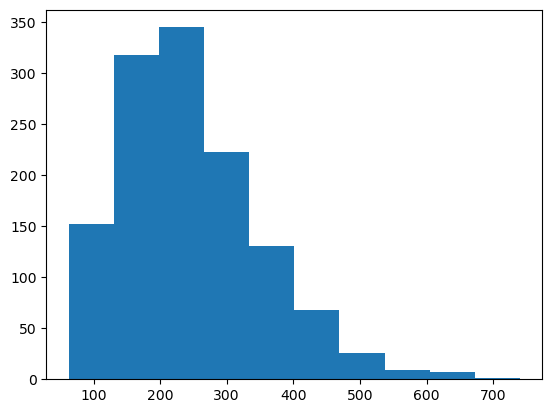

In [45]:
import matplotlib.pyplot as plt
plt.hist([len(token) for token in traintoken])

In [46]:
trainnum=utils.padding_vectorize(traintoken,token_to_idx,pad_length=100)
testnum=utils.padding_vectorize(testtoken,token_to_idx,pad_length=100)

In [47]:
import torch

train_text=torch.tensor(trainnum)
train_label=torch.FloatTensor(train.label.values)

test_text=torch.tensor(testnum)
test_label=torch.FloatTensor(test.label.values)


In [48]:
from torch.utils.data import TensorDataset,DataLoader

trainDS=TensorDataset(train_text,train_label)
testDS=TensorDataset(test_text,test_label)

trainDL=DataLoader(trainDS,batch_size=16)
testDL=DataLoader(testDS,batch_size=len(testDS))

In [53]:
model=utils.SentenceClassifier(n_vocab=len(token_to_idx),hidden_dim=64,embedding_dim=64,n_layers=4,feature_n=len(file_list),dropout=0.8)

import torch.optim as optim
import torch.nn as nn
from torchmetrics.classification import MulticlassF1Score
import torch.optim.lr_scheduler as lr_scheduler

optimizer=optim.Adam(model.parameters(),lr=0.003)
lossfun=nn.CrossEntropyLoss()
scorefun=MulticlassF1Score(num_classes=len(file_list))
scheduler=lr_scheduler.ReduceLROnPlateau(optimizer,patience=10,factor=0.5,mode='max')


In [54]:
EPOCH=100
TV=utils.Train_val(trainDL,testDL,model,optimizer,lossfun,scorefun)
train=TV.train(EPOCH,scheduler,1)

[1/100]
train loss 2.0885930746793746, train score 0.08128100172616541
test loss 2.087496280670166, test score 0.05247477442026138
scheduler.num_bad_epochs 0/10
[2/100]
train loss 2.0712772965431214, train score 0.05954602197743952
test loss 2.039506435394287, test score 0.07951781898736954
scheduler.num_bad_epochs 0/10
[3/100]
train loss 1.9683682486414908, train score 0.11469395533204078
test loss 2.0038797855377197, test score 0.10682853311300278
scheduler.num_bad_epochs 0/10
[4/100]
train loss 1.826380430161953, train score 0.16212887717410923
test loss 2.025182008743286, test score 0.1893937885761261
scheduler.num_bad_epochs 0/10
[5/100]
train loss 1.5589901953935623, train score 0.23914983551949262
test loss 1.9809461832046509, test score 0.1898864209651947
scheduler.num_bad_epochs 0/10
[6/100]
train loss 1.3270738780498506, train score 0.3564861876890063
test loss 2.080410957336426, test score 0.25692853331565857
scheduler.num_bad_epochs 0/10
[7/100]
train loss 1.088870407268405

[20/100]
train loss 0.29009385150339867, train score 0.873984322945277  
test loss 2.666813373565674, test score 0.5284493565559387  
scheduler.num_bad_epochs 0/10  

2번  
[41/100]
train loss 0.0016216536575585552, train score 0.9968253976768917  
test loss 3.6139883995056152, test score 0.4708749055862427  
scheduler.num_bad_epochs 0/10  